In [11]:
#import necessary modules

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [12]:
# Step 1: Data acquisition

df: pd.DataFrame = pd.read_excel('Data Take Home Assignment 1 Exercise A.xlsx')
df = df.iloc[142:162]
df

,X,Y
142,23.77,445.72
143,14.43,466.58
144,28.25,436.99
145,12.26,470.87
146,14.55,457.77
147,24.57,448.15
148,10.25,476.03
149,21.96,442.87
150,9.82,477.93
151,18.58,459.06


In [13]:
# Step 2: Data transformation using Min-Max normalization
# info: https://www.geeksforgeeks.org/data-normalization-in-data-mining/

def normalize(df):
    for c in df.columns: 
        df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())
    return df

df = normalize(df)
df

,X,Y
142,0.727098,0.224976
143,0.279137,0.726901
144,0.941966,0.014918
145,0.175060,0.830125
146,0.284892,0.514918
147,0.765468,0.283446
148,0.078657,0.954283
149,0.640288,0.156400
150,0.058034,1.000000
151,0.478177,0.545958


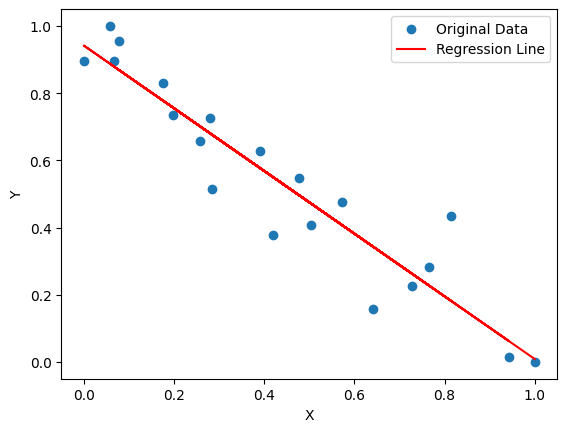

In [14]:
# Step 3: Least Squares
def least_squares(x, y):
    """Given the X and Y parameters of a data set, will return a regression line.
    The regression line is calculated with the formula `Y = m*x + b` where:
        - `Y` is the the predicted parameters,
        - `m` is the slope coefficient,
        - `b` is the y-intercept, 
        - `x` is the input data.
    
    Args:
        - `x`: original x data
        - `y`: original y data
        
    Returns:
        - `y_prediction`: regression line
    """
    n = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_squared_sum = np.sum(x**2)

    m = (n * xy_sum - x_sum*y_sum) / (n*x_squared_sum - x_sum**2) # slope coefficient
    b = (y_sum - m*x_sum) / n # y-intercept

    y_prediction = m*x + b 
    return y_prediction

y_prediction = least_squares(df.X, df.Y)

# plot original data against regression line
plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, y_prediction, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [15]:
# Step 4: Cost Function using Mean Squared Error (MSE)

def cost_function(y, y_predict):
    """Implementation of the Mean Squared Error (MSE) cost function.
    
    Args:
        - `y`: y data
        - `y_predict`: predicted data
        
    Returns:
        - MSE
    """
    return np.mean((y - y_predict)**2)

def partial_derivative_a(y, y_predict):
    """Partial derivative of the cost function with respect to a.
    """
    return np.mean(y - y_predict)

def partial_derivative_b(y, y_predict, x):
    """Partial derivative of the cost function with respect to b.
    """
    return np.mean((y - y_predict)*-x)

cost = cost_function(np.array(df.Y), np.array(y_prediction))
a_partial_derivative = partial_derivative_a(np.array(df.Y), np.array(y_prediction))
b_partial_derivative = partial_derivative_b(np.array(df.Y), np.array(y_prediction), np.array(df.X))

initial a: 0.11091714659718244
initial b: 0.6011726406959799
gradient_a: -0.11119977069030415
gradient_b: 0.14105426269065127
a after iter 1: 0.11202914430408548
b after iter 1: 0.5997620980690733


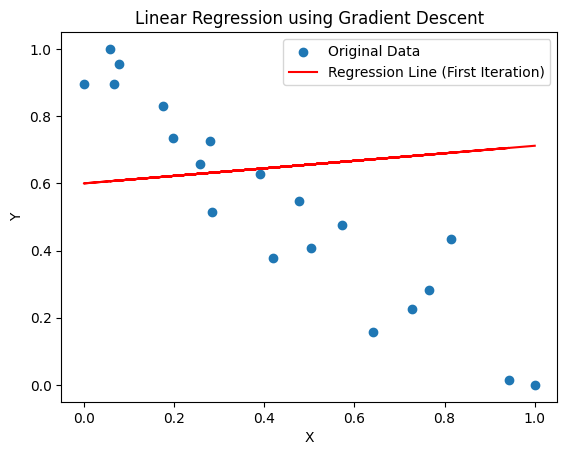

In [16]:
# Step 5 Gradient Descent first iteration

a = np.random.random()
b = np.random.random()
print("initial a:", a)
print("initial b:", b)
L = 0.01
iterations = 10000

y_prediction = a*df.X + b

gradient_a = partial_derivative_a(df.Y, y_prediction)
gradient_b = partial_derivative_b(np.array(df.Y), np.array(y_prediction), np.array(df.X))

a -= L * gradient_a
b -= L * gradient_b

print("gradient_a:", gradient_a)
print("gradient_b:", gradient_b)
print("a after iter 1:", a)
print("b after iter 1:", b)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, a * df.X + b, color='red', label='Regression Line (First Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradient_a: -0.11027029373803865
gradient_b: 0.1407511696658788
a after iter 2: 0.11313184724146587
b after iter 2: 0.5983545863724146


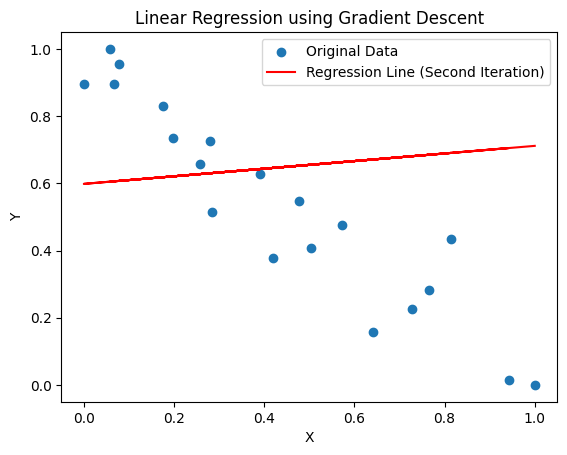

In [17]:
# Step 6 Gradient Descent - second iteration

y_prediction = a*df.X + b

gradient_a = partial_derivative_a(df.Y, y_prediction)
gradient_b = partial_derivative_b(np.array(df.Y), np.array(y_prediction), np.array(df.X))

a -= L * gradient_a
b -= L * gradient_b

print("gradient_a:", gradient_a)
print("gradient_b:", gradient_b)
print("a after iter 2:", a)
print("b after iter 2:", b)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, a * df.X + b, color='red', label='Regression Line (Second Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradient_a: -0.10933982666944564
gradient_b: 0.14044682070210862
a after iter 3: 0.11422524550816032
b after iter 3: 0.5969501181653935


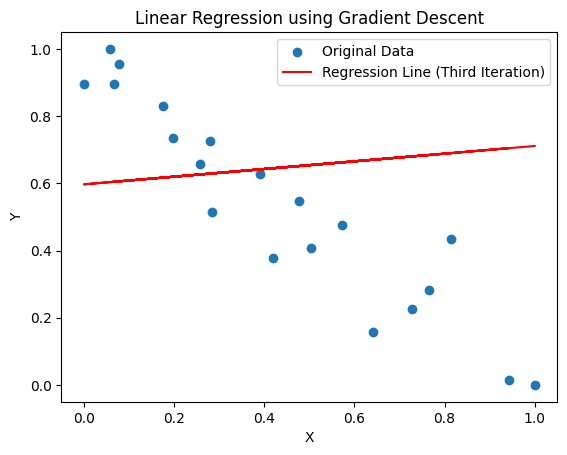

In [18]:
# Step 7 Gradient Descent - third iteration

y_prediction = a*df.X + b

gradient_a = partial_derivative_a(df.Y, y_prediction)
gradient_b = partial_derivative_b(np.array(df.Y), np.array(y_prediction), np.array(df.X))

a -= L * gradient_a
b -= L * gradient_b

print("gradient_a:", gradient_a)
print("gradient_b:", gradient_b)
print("a after iter 3:", a)
print("b after iter 3:", b)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, a * df.X + b, color='red', label='Regression Line (Third Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradient_a: -0.10933982666944564
gradient_b: -1.2589084721903455e-08
a after iter 10000: -0.9329762332676006
b after iter 10000: 0.9415756529357641


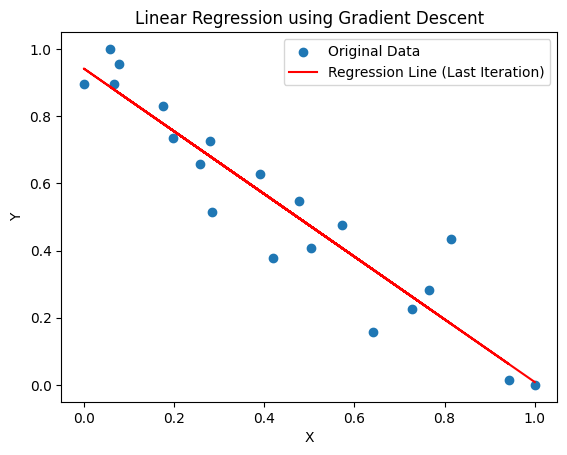

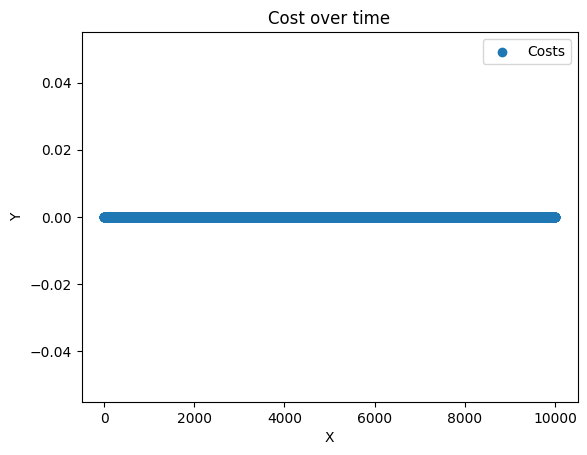

In [21]:
# Step 8 Gradient Descent - final iteration
costs = np.zeros(iterations)
for _ in range(iterations):
    # Calculate the predicted Y values
    y_prediction = a*df.X + b

    np.append(costs, cost_function(df.Y, y_prediction))

    # Calculate the gradients with respect to m and b
    gradient_m = -(1/N) * np.sum(df.X * (df.Y - y_prediction))
    gradient_b = -(1/N) * np.sum(df.Y - y_prediction)

    # Update the model parameters
    a -= L * gradient_m
    b -= L * gradient_b

print("gradient_a:", gradient_a)
print("gradient_b:", gradient_b)
print(f"a after iter {iterations}:", a)
print(f"b after iter {iterations}:", b)

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, a * df.X + b, color='red', label='Regression Line (Last Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

plt.scatter(range(10000), costs, label='Costs')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Cost over time')
plt.show()